- author: Macrina Lobo

In [1]:
library(ArchR)

#set threads to 1/2 of available cores (assuming each core has 2 threads)
addArchRThreads(threads = 8)

#set genome
addArchRGenome("mm10")

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [2]:
projFoxn1ko = loadArchRProject("/Users/LoboM/Dropbox/pharynx_figures_scATAC/FINAL_objects/ABSOLUTELY_FINAL_object_scATAC_E11_E12")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [3]:
projFoxn1ko


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /Users/LoboM/Dropbox (UMass Medical School)/pharynx_figures_scATAC/FINAL_objects/ABSOLUTELY_FINAL_object_scATAC_E11_E12 
samples(4): e11_5rep1 e12_5rep2 e12_5rep1 e11_5rep2
sampleColData names(1): ArrowFiles
cellColData names(41): Sample TSSEnrichment ...
  Clusters_test_1.2_nFrags Clusters_test_1.4_nFrags
numberOfCells(1): 10890
medianTSS(1): 15.851
medianFrags(1): 24133

In [6]:
roadmap <-  readRDS("/Users/LoboM/Dropbox/shared_Bioinformatics/scrna_objects/10x_pharynx/whole_atlas_filtered.Robj")
updated_roadmap = Seurat::UpdateSeuratObject(object = roadmap)
rm(roadmap)
#updated_roadmap_rna@assays$RNA@counts


Updating from v2.X to v3.X

Validating object structure

Updating object slots

Ensuring keys are in the proper strucutre

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version



In [10]:
updated_roadmap$RNA

Assay data with 27998 features for 54044 cells
Top 10 variable features:
 A830018L16Rik, Sulf1, Rdh10, Tfap2b, Tram2, Col9a1, Inpp4a,
X2010300C02Rik, Gpr45, Fhl2 

In [11]:
gene_names = read.table("/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/celloracle_pharynx_2021_v2_hyphen_cisbp2/input_files/cleaned_rna_gene_names.txt", header = FALSE, sep = "", dec = ".")
tmp = as.vector(gene_names$V1)

In [12]:
RenameGenesSeurat <- function(obj = ls.Seurat[[i]], newnames = tmp) { # Replace gene names in different slots of a Seurat object. Run this before integration. Run this before integration. It only changes obj@assays$RNA@counts, @data and @scale.data.
  print("Run this before integration. It only changes obj@assays$RNA@counts and @data ")
  RNA <- obj@assays$RNA

  if (nrow(RNA) == length(newnames)) {
    if (length(RNA@counts)) RNA@counts@Dimnames[[1]]            <- newnames
    if (length(RNA@data)) RNA@data@Dimnames[[1]]                <- newnames
    # if (length(RNA@scale.data)) RNA@scale.data@Dimnames[[1]]    <- newnames
  } else {"Unequal gene sets: nrow(RNA) != nrow(newnames)"}
  obj@assays$RNA <- RNA
  return(obj)
}

In [13]:
# TEST 
tmp2 = updated_roadmap@assays$RNA@data@Dimnames[[1]] 
for (entry in 1:length(tmp)){
    # print(tmp[entry])
    # compare with actual
    if (tmp[entry] != tmp2[entry]){
        print(tmp2[entry])
    }
}

[1] "Rp1.1"
[1] "Krtap28.10"
[1] "Krtap28.13"
[1] "Zfp813.ps"
[1] "Gm15853.1"
[1] "Gm16701.1"
[1] "Olfr364.ps1"
[1] "Olfr1025.ps1"
[1] "Olfr1187.ps1"
[1] "Olfr1224.ps1"
[1] "RP23.336F11.36"
[1] "Olfr1284.1"
[1] "Olfr1309.1"
[1] "Olfr1315.ps1"
[1] "Olfr1316.1"
[1] "Nkx2.4"
[1] "Nkx2.2"
[1] "Nkx2.2os"
[1] "RP23.138J20.8"
[1] "RP23.109E24.10"
[1] "Spin2.ps6"
[1] "Btg1.ps1"
[1] "Btg1.ps2"
[1] "RP23.95K12.13"
[1] "Olfr1326.ps1"
[1] "RP23.9K14.6"
[1] "RP23.240M8.2"
[1] "RP23.466J17.3"
[1] "RP23.106P7.5"
[1] "Gm2464.1"
[1] "Mir124.2hg"
[1] "Schip1.1"
[1] "Sprr2j.ps"
[1] "Flg.1"
[1] "Flg.2"
[1] "Flg.3"
[1] "Flg.4"
[1] "Flg.5"
[1] "Flg.6"
[1] "Hist2h2bb.1"
[1] "Atg4a.ps"
[1] "Vma21.ps"
[1] "RP23.354H24.9"
[1] "Nkx1.1"
[1] "Nkx3.2"
[1] "Smim20.1"
[1] "Dancr.1"
[1] "Nkx6.1"
[1] "Gbp6.1"
[1] "D130017N08Rik.1"
[1] "Umad1.1"
[1] "Smkr.ps"
[1] "Olfr237.ps1"
[1] "RP23.205F19.4"
[1] "RP24.124B23.17"
[1] "RP24.124B23.14"
[1] "RP24.492L15.6"
[1] "RP23.276L17.2"
[1] "RP24.416M6.4"
[1] "RP24.416M6.5"
[1] "

In [14]:
updated_roadmap_clean = RenameGenesSeurat(updated_roadmap,tmp)

[1] "Run this before integration. It only changes obj@assays$RNA@counts and @data "


In [32]:
for (entry in updated_roadmap_clean@assays$RNA@data@Dimnames[[1]] ){
    if (grepl( '-', entry, fixed = TRUE)){
        print(entry)
    }
}

[1] "Rp1-1"
[1] "Krtap28-10"
[1] "Krtap28-13"
[1] "Zfp813-ps"
[1] "Gm15853-1"
[1] "Gm16701-1"
[1] "Olfr364-ps1"
[1] "Olfr1025-ps1"
[1] "Olfr1187-ps1"
[1] "Olfr1224-ps1"
[1] "RP23-336F11-36"
[1] "Olfr1284-1"
[1] "Olfr1309-1"
[1] "Olfr1315-ps1"
[1] "Olfr1316-1"
[1] "Nkx2-4"
[1] "Nkx2-2"
[1] "Nkx2-2os"
[1] "RP23-138J20-8"
[1] "RP23-109E24-10"
[1] "Spin2-ps6"
[1] "Btg1-ps1"
[1] "Btg1-ps2"
[1] "RP23-95K12-13"
[1] "Olfr1326-ps1"
[1] "RP23-9K14-6"
[1] "RP23-240M8-2"
[1] "RP23-466J17-3"
[1] "RP23-106P7-5"
[1] "Gm2464-1"
[1] "Mir124-2hg"
[1] "Schip1-1"
[1] "Sprr2j-ps"
[1] "Flg-1"
[1] "Flg-2"
[1] "Flg-3"
[1] "Flg-4"
[1] "Flg-5"
[1] "Flg-6"
[1] "Hist2h2bb-1"
[1] "Atg4a-ps"
[1] "Vma21-ps"
[1] "RP23-354H24-9"
[1] "Nkx1-1"
[1] "Nkx3-2"
[1] "Smim20-1"
[1] "Dancr-1"
[1] "Nkx6-1"
[1] "Gbp6-1"
[1] "D130017N08Rik-1"
[1] "Umad1-1"
[1] "Smkr-ps"
[1] "Olfr237-ps1"
[1] "RP23-205F19-4"
[1] "RP24-124B23-17"
[1] "RP24-124B23-14"
[1] "RP24-492L15-6"
[1] "RP23-276L17-2"
[1] "RP24-416M6-4"
[1] "RP24-416M6-5"
[1] "

- subset to E11-E12

In [33]:
updated_roadmap_clean_11_12 = subset(x =updated_roadmap_clean, subset = eday == c("11.5",'12.5'))

In [16]:
library(Seurat)


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




In [34]:
seRNA_whole <- as.SingleCellExperiment(updated_roadmap_clean_11_12)
#seRNA
colnames(colData(seRNA_whole))
colData(seRNA_whole)$ident %<>% as.character 
table(colData(seRNA_whole)$ident)

[1] "orig.ident"              "eday"                   
 [3] "nUMI_mt"                 "nUMI_rp"                
 [5] "nUMI_pct_mt"             "nUMI_pct_rp"            
 [7] "mt_nUMI_pct"             "ribo_nUMI_pct"          
 [9] "Y_genes"                 "res.2"                  
[11] "ident0"                  "ident1"                 
[13] "ident2"                  "ident3"                 
[15] "ident4"                  "ident5"                 
[17] "ident6"                  "ident7"                 
[19] "ident8"                  "ident9"                 
[21] "ident10"                 "ident11"                
[23] "ident12"                 "ident13"                
[25] "ident14"                 "ident15"                
[27] "ident16"                 "ident17"                
[29] "ident18"                 "ident19"                
[31] "ident20"                 "ident21"                
[33] "ident22"                 "ident23"                
[35] "ident24"                 "ident25"                
[37] "ident26"                 "ident27"                
[39] "ident28"                 "ident29"                
[41] "ident30"                 "ident31"                
[43] "ident32"                 "ident33"                
[45] "ident34"                 "ident35"                
[47] "ident36"                 "ident37"                
[49] "ident38"                 "ident39"                
[51] "ident40"                 "ident41"                
[53] "ident42"                 "S.Score"                
[55] "G2M.Score"               "Phase"                  
[57] "log10_nUMI"              "nUMI_means"             
[59] "log10_nUMI_rep_adjusted" "is_low_quality"         
[61] "nUMI_pct_mt_capped"      "pANN"                   
[63] "pANNPredictions"         "is_doublet"             
[65] "XY"                      "excess_XY_given_nUMI"   
[67] "collagen_total"          "hb_total"               
[69] "preliminary_ident"       "included"               
[71] "basis_e12"               "basis_e9"               
[73] "basis_e10a"              "basis_e10b"             
[75] "basis_e11a"              "basis_e11b"             
[77] "res.1"                   "nCount_RNA"             
[79] "nFeature_RNA"            "ident"


   0    1   10   11   12   13   14   15   16   18   19    2   20   21   22   25 
1548    8  319  790  619    1    3  410   14  614  248  556  566    6  308  259 
  26   27    3    4    5    6    7    8    9 
 221   80  395 1472  767 1412 1299  862 1016 

In [38]:
table(colData(seRNA_whole)$eday)


11.5 12.5 
8249 5544 

In [35]:
seRNA_whole

class: SingleCellExperiment 
dim: 27998 13793 
metadata(0):
assays(2): counts logcounts
rownames(27998): Xkr4 Gm1992 ... Vmn2r122 CAAA01147332-1
rowData names(0):
colnames(13793): AAGACCTTCCCAGGTG|CR_pharynx_E11_5_rep2
  CGTCCATAGTACGTTC|CR_pharynx_E11_5_rep2 ...
  TGTATTCAGCATGGCA|CR_pharynx_E12_5_rep2
  TTCTTAGGTAGTAGTA|CR_pharynx_E12_5_rep2
colData names(80): orig.ident eday ... nFeature_RNA ident
reducedDimNames(3): PCA TSNE UMAP
spikeNames(0):
altExpNames(0):

In [18]:
# Load figure 1 cluster colors 
fig1_clusters = read.csv("/Users/LoboM/Documents/ArchR_Analysis//fig1_cluster_names_simple.csv", stringsAsFactors = F)
fig1_colors = setNames(fig1_clusters$colour, fig1_clusters$cell_type) %>% c("removed"="black")






- test that the embedding is correct

In [19]:
p1_2 <- plotEmbedding(ArchRProj = projFoxn1ko, size = 1.0,colorBy = "cellColData", name = "Sample", embedding = "UMAP_test_nFrags")

plotPDF(p1_2, name = "test_sample.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 5, height = 5)



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-204b55c6b40e-Date-2021-05-14_Time-15-31-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-204b55c6b40e-Date-2021-05-14_Time-15-31-19.log

Plotting Ggplot!



- redo the integration

In [36]:
projFoxn1ko <- addGeneIntegrationMatrix(
    ArchRProj = projFoxn1ko, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix_e11_12_fil_clean",
    reducedDims = "IterativeLSI_test",
    seRNA = seRNA_whole,
    sampleCellsATAC = nCells(projFoxn1ko),sampleCellsRNA=dim(seRNA_whole)[2],
    addToArrow = TRUE,
    groupRNA = "ident",#groupATAC='Harmony_Replicate_Clusters_1.4',
    nameCell = "predictedCell_e11_12_fil_clean",
    nameGroup = "predictedGroup_e11_12_fil_clean",
    nameScore = "predictedScore_e11_12_fil_clean",force=TRUE
)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-204b40af015-Date-2021-05-14_Time-15-44-03.log
If there is an issue, please report to github with logFile!

2021-05-14 15:44:03 : Running Seurat's Integration Stuart* et al 2019, 0.002 mins elapsed.

2021-05-14 15:44:04 : Checking ATAC Input, 0.009 mins elapsed.

2021-05-14 15:44:04 : Checking RNA Input, 0.009 mins elapsed.

2021-05-14 15:44:07 : Found 20165 overlapping gene names from gene scores and rna matrix!, 0.061 mins elapsed.

2021-05-14 15:44:07 : Creating Integration Blocks, 0.062 mins elapsed.

2021-05-14 15:44:07 : Prepping Interation Data, 0.063 mins elapsed.

2021-05-14 15:44:07 : Computing Integration in 1 Integration Blocks!, 0 mins elapsed.

2021-05-14 15:44:07 : Block (1 of 1) : Computing Integration, 0 mins elapsed.

2021-05-14 15:44:09 : Block (1 of 1) : Identifying Variable Genes, 0.029 mins elapsed.

2021-05-14 15:44:14 : Block (1 of 1) : Getting GeneScoreMatrix, 0.111 mins elapsed.

2021-05-14 15:44:29 : 

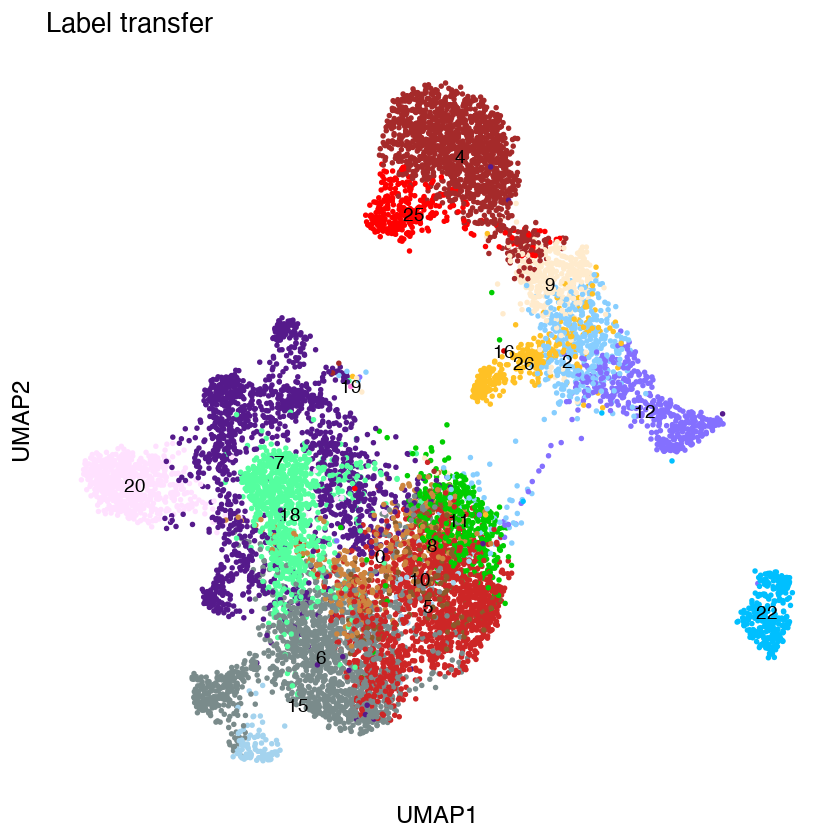

Plotting Ggplot!

Plotting Patchwork!



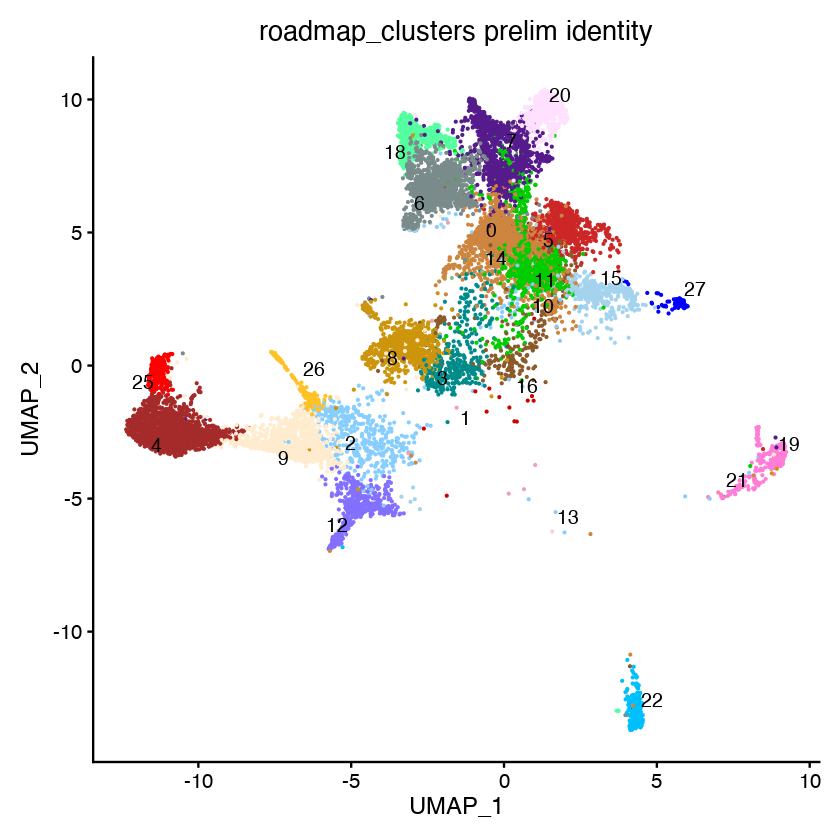

In [39]:
# Plot label transfer
X = data.frame(projFoxn1ko@embeddings$UMAP_test_nFrags[[1]], projFoxn1ko$predictedGroup_e11_12_fil_clean) %>% 
  set_colnames(c("UMAP1", "UMAP2", "transferred_label_Un_whole_fil")) 
p1 <- ggplot(X) + 
  geom_point(aes(x = UMAP1, y = UMAP2, colour = transferred_label_Un_whole_fil), size = 0.5) + 
  geom_text(data = aggregate(X[1:2], X[3], mean), 
            aes(x = UMAP1, y = UMAP2, label = transferred_label_Un_whole_fil)) + 
  scale_color_manual(values = fig1_colors) + 
  cowplot::theme_cowplot() + coord_fixed() + 
  ggtitle("Label transfer") + 
  theme(axis.line = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(), legend.position = "none")
p1
p2 <- DimPlot(updated_roadmap_clean_11_12, group.by = 'ident', label = TRUE, cols= fig1_colors ,repel = TRUE) + NoLegend() + ggtitle('roadmap_clusters prelim identity')
p2
plotPDF(p1,p2, name = "Fig2d.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 5, height = 5)

In [40]:
# overwrite ABSOLUTELY_FINAL_object_scATAC_E11_E12
saveArchRProject(ArchRProj = projFoxn1ko, outputDirectory = "Save-projArch_ABSOLUTELY_FINAL_KO_WT_WHOLE_OBJ_with_label_transfer_hyphen_solved", load = FALSE)

Copying ArchRProject to new outputDirectory : /Users/LoboM/Documents/e11_12_analysis/notebooks/Save-projArch_ABSOLUTELY_FINAL_KO_WT_WHOLE_OBJ_with_label_transfer_hyphen_solved

Copying Arrow Files...

Copying Arrow Files (1 of 4)

Copying Arrow Files (2 of 4)

Copying Arrow Files (3 of 4)

Copying Arrow Files (4 of 4)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 8): e11_5rep1

Copying Other Files (2 of 8): e11_5rep2

Copying Other Files (3 of 8): e12_5rep1

Copying Other Files (4 of 8): e12_5rep2

Copying Other Files (5 of 8): Embeddings

Copying Other Files (6 of 8): IterativeLSI_test

Copying Other Files (7 of 8): Plots

Copying Other Files (8 of 8): RNAIntegration

Saving ArchRProject...



- panel for geneintegration

In [1]:
handpicked_genes  <- read.csv("~/Dropbox/pharynx_celloracle/objects/e11_e12_dataframes/genes_to_label.csv", stringsAsFactors = F, header = F)[[1]]


In [2]:
handpicked_genes

[1] "Sox2"    "Foxa2"   "Gcm2"    "Pth"     "Chga"    "Ccl21a"  "Pdgfra" 
 [8] "Esam"    "Ptprc"   "Pax3"    "Rxrg"    "Dlx5"    "Sox10"   "Neurod1"
[15] "Pax9"    "Epcam"   "Foxn1"   "Pax1"    "Il7"     "Krt5"    "Ccl25"  
[22] "Tbata"   "Prss16"  "Psmb11"  "Ctsl"    "Calca"   "Hoxa3"   "Pax8"   
[29] "Nkx2-1"  "Hhex"    "Barx2"   "Krt14"   "Nkx2-3"  "Etv5"    "F3"     
[36] "Foxp1"   "Foxp2"   "Gata6"   "Id2"     "Sftpb"   "Sftpc"   "Sox9"   
[43] "Barx1"   "Klf4"    "Kremen2" "Krt15"   "Mt1"     "Mt2"     "Pitx1"  
[50] "Pitx2"   "Snai2"   "Sostdc1" "Tbx2"    "Tbx3"    "Trp63"   "Acta2"  
[57] "Cald1"   "Ebf1"    "Etv4"    "Fgfr2"   "Irf6"    "Krt19"   "Lrrn1"  
[64] "Mmp2"    "Runx1"   "Six1"    "Tagln"   "Vim"     "Cxcl14"  "Fgf8"   
[71] "Foxi2"   "Gjb2"    "Gjb6"    "Msx1"    "Msx2"    "Tfap2a"  "Tfap2b" 
[78] "Ascl1"   "Pbx1"    "Ripply3" "Tgfb2"   "Gata3"   "Mafb"    "Foxg1"  
[85] "Grhl3"   "Notch1"  "Ovol1"   "Ovol2"

In [3]:
handpicked_genes  <- read.csv("~/Dropbox/pharynx_celloracle/objects/e11_e12_dataframes/genes_to_label.csv", stringsAsFactors = F, header = F)[[1]]




In [4]:
handpicked_genes[89] = 'Grhl1'

In [5]:
handpicked_genes[90] = 'Trp53'

- reload object

In [10]:
# overwrite ABSOLUTELY_FINAL_object_scATAC_E11_E12
projFoxn1ko = loadArchRProject("/Users/LoboM/Documents/e11_12_analysis/notebooks/Save-projArch_ABSOLUTELY_FINAL_KO_WT_WHOLE_OBJ_with_label_transfer_hyphen_solved")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [11]:
projFoxn1ko <- addImputeWeights(projFoxn1ko,corCutOff = 0.4,reducedDims = "IterativeLSI_test",k=5)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-232b3a47ace0-Date-2021-05-14_Time-16-43-36.log
If there is an issue, please report to github with logFile!

2021-05-14 16:43:36 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Filtering 2 dims correlated > 0.4 to log10(depth + 1)



In [14]:
paletteContinuous(set = "solarExtra", n = 256, reverse = FALSE)


[1] "#3361A5" "#3262A7" "#3263A9" "#3164AC" "#3166AE" "#3067B1" "#3068B3"
  [8] "#2F6AB6" "#2F6BB8" "#2E6CBB" "#2E6DBD" "#2D6FBF" "#2D70C2" "#2C71C4"
 [15] "#2C73C7" "#2B74C9" "#2B75CC" "#2B76CE" "#2A78D1" "#2A79D3" "#297AD5"
 [22] "#297CD8" "#287DDA" "#287EDD" "#277FDF" "#2781E2" "#2682E4" "#2683E7"
 [29] "#2585E9" "#2586EB" "#2487EE" "#2488F0" "#238AF3" "#238BF3" "#228CF3"
 [36] "#228EF4" "#218FF4" "#2190F4" "#2091F5" "#2093F5" "#1F94F6" "#1F95F6"
 [43] "#1E97F6" "#1E98F7" "#1D99F7" "#1D9AF7" "#1C9CF8" "#1C9DF8" "#1B9EF9"
 [50] "#1BA0F9" "#1AA1F9" "#1AA2FA" "#19A3FA" "#19A5FA" "#18A6FB" "#18A7FB"
 [57] "#17A9FC" "#17AAFC" "#16ABFC" "#16ACFD" "#15AEFD" "#15AFFD" "#14B0FE"
 [64] "#14B2FE" "#14B3FE" "#18B4FE" "#1CB4FD" "#1FB5FD" "#23B6FC" "#27B7FC"
 [71] "#2AB8FB" "#2EB9FB" "#32B9FA" "#35BAFA" "#39BBF9" "#3CBCF9" "#40BDF8"
 [78] "#44BEF8" "#47BFF7" "#4BBFF7" "#4FC0F6" "#52C1F6" "#56C2F5" "#5AC3F5"
 [85] "#5DC4F4" "#61C4F4" "#64C5F3" "#68C6F3" "#6CC7F2" "#6FC8F2" "#73C9F1"
 [92] "#77CAF1" "#7ACAF0" "#7ECBF0" "#82CCEF" "#85CDEF" "#88CEEE" "#8ACEEE"
 [99] "#8CCEED" "#8ECEEC" "#8FCEEC" "#91CFEB" "#93CFEB" "#95CFEA" "#96CFEA"
[106] "#98D0E9" "#9AD0E8" "#9CD0E8" "#9ED0E7" "#9FD0E7" "#A1D1E6" "#A3D1E5"
[113] "#A5D1E5" "#A7D1E4" "#A8D2E4" "#AAD2E3" "#ACD2E2" "#AED2E2" "#B0D2E1"
[120] "#B1D3E1" "#B3D3E0" "#B5D3DF" "#B7D3DF" "#B8D4DE" "#BAD4DE" "#BCD4DD"
[127] "#BED4DC" "#C0D4DC" "#C1D4DA" "#C2D4D8" "#C4D4D6" "#C5D4D4" "#C6D4D2"
[134] "#C8D4D0" "#C9D4CD" "#CAD4CB" "#CBD4C9" "#CDD4C7" "#CED4C5" "#CFD4C3"
[141] "#D1D4C0" "#D2D4BE" "#D3D4BC" "#D4D4BA" "#D6D3B8" "#D7D3B6" "#D8D3B3"
[148] "#DAD3B1" "#DBD3AF" "#DCD3AD" "#DDD3AB" "#DFD3A9" "#E0D3A6" "#E1D3A4"
[155] "#E3D3A2" "#E4D3A0" "#E5D39E" "#E6D39C" "#E8D399" "#E9D397" "#EAD294"
[162] "#EAD190" "#EBD08C" "#ECCF88" "#ECCE84" "#EDCD80" "#EDCC7D" "#EECB79"
[169] "#EFCA75" "#EFC971" "#F0C86D" "#F0C769" "#F1C665" "#F2C561" "#F2C45D"
[176] "#F3C359" "#F3C255" "#F4C151" "#F5C04D" "#F5BF4A" "#F6BE46" "#F6BD42"
[183] "#F7BC3E" "#F8BB3A" "#F8BA36" "#F9B932" "#F9B82E" "#FAB72A" "#FBB626"
[190] "#FBB522" "#FCB41E" "#FCB31A" "#FCAF1A" "#FBAB1A" "#FAA71B" "#FAA21B"
[197] "#F99E1C" "#F89A1C" "#F7951D" "#F6911D" "#F68D1E" "#F5891E" "#F4841F"
[204] "#F3801F" "#F37C20" "#F27720" "#F17321" "#F06F21" "#EF6B22" "#EF6622"
[211] "#EE6223" "#ED5E23" "#EC5924" "#EB5524" "#EB5125" "#EA4C25" "#E94826"
[218] "#E84426" "#E84027" "#E73B27" "#E63728" "#E53328" "#E42E29" "#E42A29"
[225] "#E22929" "#E02929" "#DE2828" "#DC2828" "#DA2828" "#D82727" "#D52727"
[232] "#D32626" "#D12626" "#CF2525" "#CD2525" "#CB2525" "#C92424" "#C72424"
[239] "#C52323" "#C32323" "#C12323" "#BF2222" "#BD2222" "#BB2121" "#B92121"
[246] "#B72121" "#B52020" "#B32020" "#B11F1F" "#AF1F1F" "#AD1F1F" "#AB1E1E"
[253] "#A91E1E" "#A71D1D" "#A51D1D" "#A31D1D"

In [ ]:
ArchRPalettes

$stallion
        1         2         3         4         5         6         7         8 
"#D51F26" "#272E6A" "#208A42" "#89288F" "#F47D2B" "#FEE500" "#8A9FD1" "#C06CAB" 
       19        10        11        12        13        14        15        16 
"#E6C2DC" "#90D5E4" "#89C75F" "#F37B7D" "#9983BD" "#D24B27" "#3BBCA8" "#6E4B9E" 
       17        18         9        20 
"#0C727C" "#7E1416" "#D8A767" "#3D3D3D" 

$stallion2
        1         2         3         4         5         6         7         8 
"#D51F26" "#272E6A" "#208A42" "#89288F" "#F47D2B" "#FEE500" "#8A9FD1" "#C06CAB" 
       19        10        11        12        13        14        15        16 
"#E6C2DC" "#90D5E4" "#89C75F" "#F37B7D" "#9983BD" "#D24B27" "#3BBCA8" "#6E4B9E" 
       17        18         9 
"#0C727C" "#7E1416" "#D8A767" 

$calm
        1         2         3         4         5         6         7         8 
"#7DD06F" "#844081" "#688EC1" "#C17E73" "#484125" "#6CD3A7" "#597873" "#7B6FD0" 
        9        10        11        12        13        14        15        16 
"#CF4A31" "#D0CD47" "#722A2D" "#CBC594" "#D19EC4" "#5A7E36" "#D4477D" "#403552" 
       17        18        19        20 
"#76D73C" "#96CED5" "#CE54D1" "#C48736" 

$kelly
        1         2         3         4         5         6         7         8 
"#FFB300" "#803E75" "#FF6800" "#A6BDD7" "#C10020" "#CEA262" "#817066" "#007D34" 
        9        10        11        12        13        14        15        16 
"#F6768E" "#00538A" "#FF7A5C" "#53377A" "#FF8E00" "#B32851" "#F4C800" "#7F180D" 
       17        18        19        20 
"#93AA00" "#593315" "#F13A13" "#232C16" 

$bear
        1         2         3         4         5         6         7         8 
"#faa818" "#41a30d" "#fbdf72" "#367d7d" "#d33502" "#6ebcbc" "#37526d" "#916848" 
        9        10        11        12        13        14        15        16 
"#f5b390" "#342739" "#bed678" "#a6d9ee" "#0d74b6" "#60824f" "#725ca5" "#e0598b" 

$ironMan
        9         3         2        10        14        12         1         8 
"#371377" "#7700FF" "#9E0142" "#FF0080" "#DC494C" "#F88D51" "#FAD510" "#FFFF5F" 
        4        13         5         7        11         6        15 
"#88CFA4" "#238B45" "#02401B" "#0AD7D3" "#046C9A" "#A2A475"  "grey35" 

$circus
        1         2         3         4         5         6         7         8 
"#D52126" "#88CCEE" "#FEE52C" "#117733" "#CC61B0" "#99C945" "#2F8AC4" "#332288" 
        9        10        11        12        13        14        15 
"#E68316" "#661101" "#F97B72" "#DDCC77" "#11A579" "#89288F" "#E73F74" 

$paired
        9         1         3        12        11         2        10         4 
"#A6CDE2" "#1E78B4" "#74C476" "#34A047" "#F59899" "#E11E26" "#FCBF6E" "#F47E1F" 
        5         8         6         7 
"#CAB2D6" "#6A3E98" "#FAF39B" "#B15928" 

$grove
       11         9         1         6         8         2        10         3 
"#1a1334" "#01545a" "#017351" "#03c383" "#aad962" "#fbbf45" "#ef6a32" "#ed0345" 
        7         5         4 
"#a12a5e" "#710162" "#3B9AB2" 

$summerNight
        1         2         3         4         5         6         7 
"#2a7185" "#a64027" "#fbdf72" "#60824f" "#9cdff0" "#022336" "#725ca5" 

$zissou
        1         4         3         5         2 
"#3B9AB2" "#78B7C5" "#EBCC2A" "#E1AF00" "#F21A00" 

$darjeeling
        1         2         3         4         5 
"#FF0000" "#00A08A" "#F2AD00" "#F98400" "#5BBCD6" 

$rushmore
        1         5         2         4         3 
"#E1BD6D" "#EABE94" "#0B775E" "#35274A" "#F2300F" 

$captain
        1         2         3         4         5 
   "grey" "#A1CDE1" "#12477C" "#EC9274" "#67001E" 

$horizon
        1         4         6        10         8         3         7         5 
"#000075" "#2E00FF" "#9408F7" "#C729D6" "#FA4AB5" "#FF6A95" "#FF8B74" "#FFAC53" 
        9         2 
"#FFCD32" "#FFFF60" 

$horizonExtra
        1         4         6         8         3         9         7         5 

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-232b29bcf53c-Date-2021-05-14_Time-17-27-59.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneIntegrationMatrix_e11_12_fil_clean

Getting Matrix Values...

2021-05-14 17:28:00 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 
78 
79 
80 
81 
82 
83 
84 
85 
86 
87 
88 
89 
90 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-232b29bcf53c-Date-2021-05-14_Time-17-27-59.log

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotti

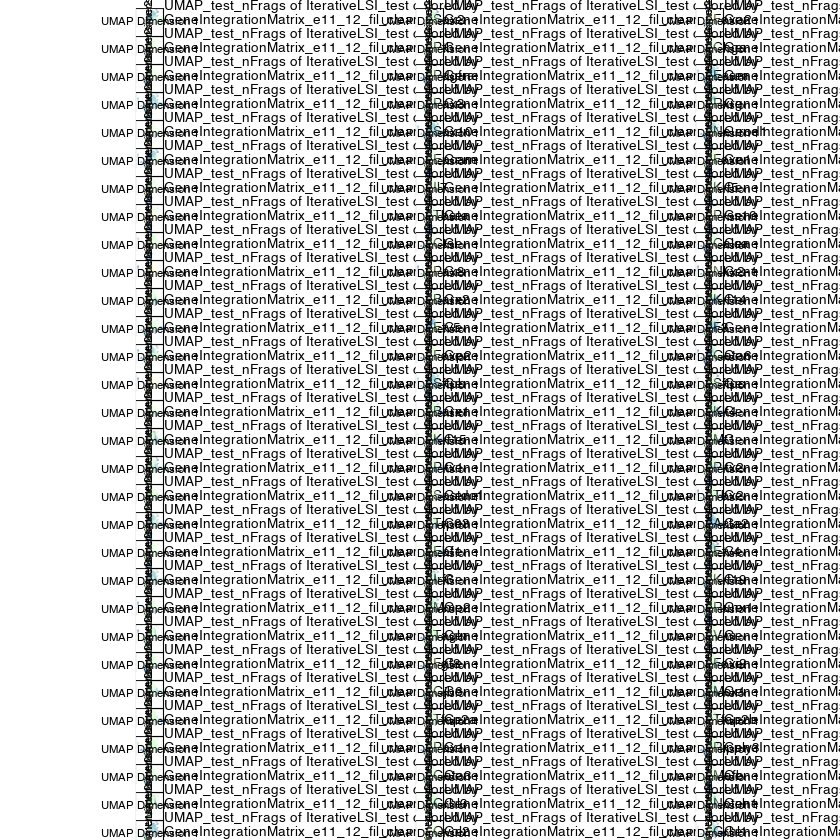

In [37]:
p <- plotEmbedding(
    ArchRProj = projFoxn1ko, 
    colorBy = "GeneIntegrationMatrix_e11_12_fil_clean", 
    name =handpicked_genes, 
    embedding = "UMAP_test_nFrags",pal=paletteContinuous(set = "greenBlue", n = 256, reverse = FALSE),
    imputeWeights = getImputeWeights(projFoxn1ko)
)

p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))
plotPDF(p2, name = "Fig2g_alternate_panel_gene_score_from_rna_integration.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 5, height = 5)


In [13]:
projFoxn1ko


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /Users/LoboM/Documents/e11_12_analysis/notebooks/Save-projArch_ABSOLUTELY_FINAL_KO_WT_WHOLE_OBJ_with_label_transfer_hyphen_solved 
samples(4): e11_5rep1 e12_5rep2 e12_5rep1 e11_5rep2
sampleColData names(1): ArrowFiles
cellColData names(44): Sample TSSEnrichment ...
  predictedGroup_e11_12_fil_clean predictedScore_e11_12_fil_clean
numberOfCells(1): 10890
medianTSS(1): 15.851
medianFrags(1): 24133